<a href="https://colab.research.google.com/github/sundar911/portfolio_optimisation/blob/main/optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)

In [ ]:
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [ ]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)

In [ ]:
stocks.columns = ['aapl','cisco','ibm','amzn']

In [ ]:
stocks

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [ ]:
stocks.shift(1)

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,53.063218,15.752778,160.830881,179.03
2012-01-05,53.348386,16.057180,160.174781,177.51
2012-01-06,53.940658,15.997991,159.415086,177.61
2012-01-09,54.504543,15.938801,157.584912,182.61
...,...,...,...,...
2016-12-23,115.319661,29.662760,164.134021,766.34
2016-12-27,115.547742,29.730928,163.790152,760.59
2016-12-28,116.281568,29.877002,164.212620,771.40


In [ ]:
stocks

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [ ]:
stocks_daily_ret = stocks.pct_change(1).mean()
stocks_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [ ]:
stocks.pct_change(1).corr() #correlation

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [ ]:
log_ret = np.log(stocks/stocks.shift(1)) #log returns
log_ret

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428
...,...,...,...,...
2016-12-23,0.001976,0.002295,-0.002097,-0.007531
2016-12-27,0.006331,0.004901,0.002576,0.014113
2016-12-28,-0.004273,-0.008511,-0.005700,0.000946


/Users/sundarraghavanl/opt/anaconda2/envs/pyfinance/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sundarraghavanl/opt/anaconda2/envs/pyfinance/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


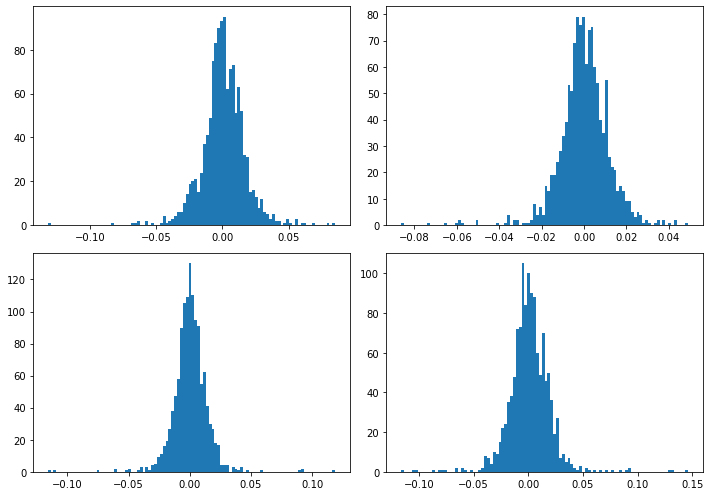

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
axes[0,0].hist(log_ret['aapl'],bins=100,alpha=1)
axes[1,0].hist(log_ret['cisco'],bins=100,alpha=1)
axes[0,1].hist(log_ret['ibm'],bins=100,alpha=1)
axes[1,1].hist(log_ret['amzn'],bins=100,alpha=1)
plt.tight_layout()

In [ ]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [ ]:
log_ret.cov() * 252 #cov=covariance

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


## Trial and error

initialising random weights and checking returns 

In [ ]:
np.random.seed(101)
weights = np.array(np.random.random(4))
weights = weights/np.sum(weights) #to make sum=1
print('weights')
weights

weights


array([0.40122278, 0.44338777, 0.02212343, 0.13326603])

In [ ]:
exp_ret = sum((log_ret.mean()*weights)*252) #= expected annual returns = mean of daily log returns * respective weights * no of trading days 
print('expected returns')
exp_ret

expected returns


0.15599272049632004

In [ ]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print('expected volatility')
exp_vol

expected volatility


0.18502649565909488

In [ ]:
sr = exp_ret/exp_vol

In [ ]:
print('sharpe ratio')
sr

sharpe ratio


0.8430831483926032

repeating the above process 5000 times over and taking the best result

In [ ]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)
    
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
sharpe_arr.max()

1.0303260551271067

In [ ]:
sharpe_arr.argmax()

1419

In [ ]:
all_weights[1419]

array([0.0692233 , 0.16473546, 0.43742662, 0.32861462])

In [ ]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

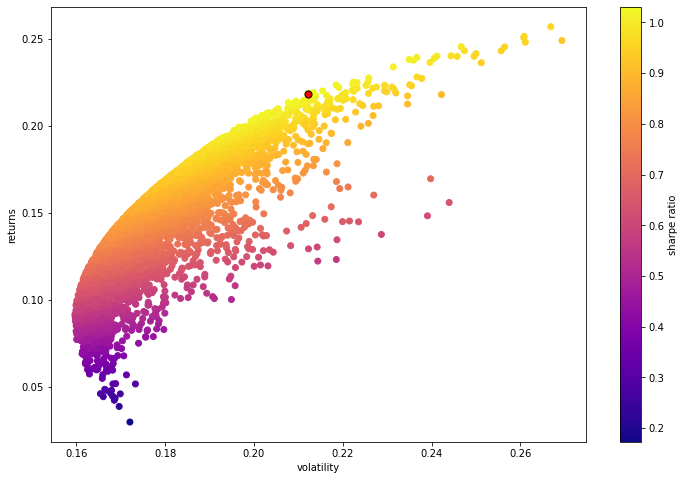

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='sharpe ratio')
plt.xlabel('volatility')
plt.ylabel('returns')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

the particluar combination of weights that we got the maximum returns for, yields the red dot in the above graph. so if we were to maximise returns for any given volatility, we would travel along the edge/fonrtier of the above curve.

## scipy optimise

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean()*weights)*252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [ ]:
get_ret_vol_sr([0.4,0.4,0.1,0.1]) #returns returns, volatility and sharpe ratio

array([0.14103196, 0.17937864, 0.78622493])

In [ ]:
from scipy.optimize import minimize

In [ ]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 #mutliplying sharpe ratio by -1 in order to get a quantity we can minimise, hence maximising the actual sharpe ratio

In [ ]:
def check_sum(weights):
    return np.sum(weights)-1 #return 0 if sum of weights = 1 

In [ ]:
cons = ({'type':'eq','fun':check_sum}) #defining constraints

In [ ]:
bounds = ((0,1),(0,1),(0,1),(0,1)) #bounds for weights

In [ ]:
init_guess = [0.25,0.25,0.25,0.25] #starting point for the weights 

In [ ]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons) #where the magic happens, our optimise function (Sequential Least SQuares Programming)

In [ ]:
opt_results #returns lot of things including the function value, jacobian and weights 

     fun: -1.030716870335278
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [ ]:
opt_results.x #optimal weights

array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [ ]:
get_ret_vol_sr(opt_results.x) #returns, volatility and sharpe ratio for above weights

array([0.21885915, 0.21233683, 1.03071687])

In [ ]:
frontier_y = np.linspace(0,0.3,100) #our returns ranged from 0 to 0.3 so let's minimise volatility for a list of values from 0 to 0.3

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [ ]:
def get_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0]-possible_return}) #checking that for a weight w, we have the maximum possible return as the difference must result in 0 if that's true
    result = minimize(get_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons) #we minimise volatility for every y value (i.e., for every return) and hence we will end up getting the border line from the previous graph
    #we treat volatility as a function of weights
    frontier_vol.append(result['fun']) 

In [ ]:
result #value of result in the last iteration

     fun: 0.30735923335533283
     jac: array([0.0617701 , 0.06492731, 0.04860464, 0.30735923])
 message: 'Positive directional derivative for linesearch'
    nfev: 103
     nit: 12
    njev: 8
  status: 8
 success: False
       x: array([3.87911188e-14, 1.19018270e-16, 2.19011946e-14, 1.00000000e+00])

In [ ]:
result['fun'] #value of result['fun'] in the last iteration 

0.30735923335533283

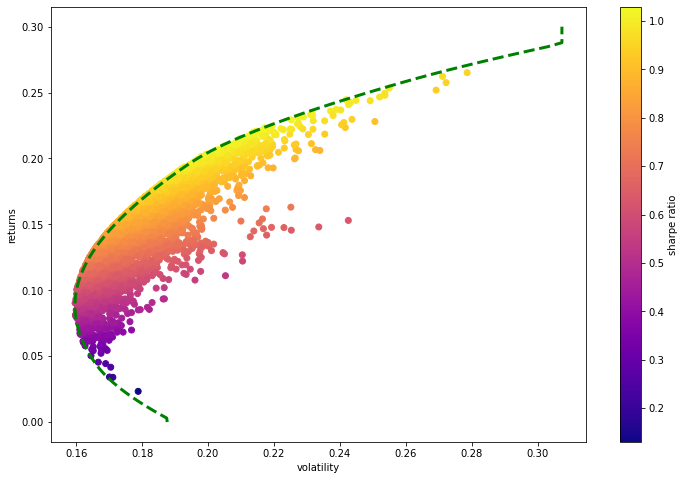

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='sharpe ratio')
plt.xlabel('volatility')
plt.ylabel('returns')

plt.plot(frontier_vol,frontier_y,'g--',lw=3)